In [1]:
import pandas as pd                                     #Required libraries
import pm4py
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
log = pm4py.read_xes('BPIC15_5.xes')          #Converting xes data to csv.
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
dataframe.head()

,question,dateFinished,dueDate,action_code,activityNameEN,planned,time:timestamp,monitoringResource,org:resource,activityNameNL,...,case:landRegisterID,case:parts,case:termName,case:startDate,case:requestComplete,case:IDofConceptCase,case:caseProcedure,case:Includes_subCases,case:endDatePlanned,dateStop
0,EMPTY,2014-01-10 00:00:00,2014-01-15 08:45:53+01:00,01_HOOFD_010,register submission date request,2014-01-13 08:45:53+01:00,2014-01-06 00:00:00+01:00,8492512,8492512,registratie datum binnenkomst aanvraag,...,6966675,Bouw,Termijn bezwaar en beroep 1,2014-01-06 00:00:00+01:00,TRUE,10061287,NaN,NaN,NaN,NaN
1,False,2014-01-10 00:00:00,NaN,01_HOOFD_011,OLO messaging active,2014-01-13 08:55:48+01:00,2014-01-10 00:00:00+01:00,560604,8492512,OLO berichtenverkeer actief,...,6966675,Bouw,Termijn bezwaar en beroep 1,2014-01-06 00:00:00+01:00,TRUE,10061287,NaN,NaN,NaN,NaN
2,True,2014-01-10 00:00:00,NaN,01_HOOFD_020,send confirmation receipt,2014-01-13 08:55:49+01:00,2014-01-10 00:00:00+01:00,560604,8492512,versturen ontvangstbevestiging,...,6966675,Bouw,Termijn bezwaar en beroep 1,2014-01-06 00:00:00+01:00,TRUE,10061287,NaN,NaN,NaN,NaN
3,True,2014-01-10 00:00:00,NaN,03_GBH_005,applicant is stakeholder,2014-01-13 08:55:49+01:00,2014-01-10 00:00:00+01:00,560604,8492512,aanvrager is belanghebbende,...,6966675,Bouw,Termijn bezwaar en beroep 1,2014-01-06 00:00:00+01:00,TRUE,10061287,NaN,NaN,NaN,NaN
4,False,2014-01-10 00:00:00,NaN,05_EIND_010,terminate on request,2014-01-13 08:55:49+01:00,2014-01-10 00:00:00+01:00,560604,8492512,beeindigen op verzoek,...,6966675,Bouw,Termijn bezwaar en beroep 1,2014-01-06 00:00:00+01:00,TRUE,10061287,NaN,NaN,NaN,NaN


# 1. Data Analysis

In [3]:
dataframe.columns           #total columns

Index(['question', 'dateFinished', 'dueDate', 'action_code', 'activityNameEN',
       'planned', 'time:timestamp', 'monitoringResource', 'org:resource',
       'activityNameNL', 'concept:name', 'lifecycle:transition',
       'case:endDate', 'case:caseStatus', 'case:SUMleges', 'case:last_phase',
       'case:case_type', 'case:concept:name', 'case:Responsible_actor',
       'case:landRegisterID', 'case:parts', 'case:termName', 'case:startDate',
       'case:requestComplete', 'case:IDofConceptCase', 'case:caseProcedure',
       'case:Includes_subCases', 'case:endDatePlanned', 'dateStop'],
      dtype='object')

In [4]:
unique=[]
clmn=['Unique value']
for col in dataframe:
    unique.append(len(dataframe[col].unique()))
    
unique= pd.DataFrame(unique, index= dataframe.columns, columns=clmn)       #No of unique values of each column
unique

,Unique value
question,625
dateFinished,5683
dueDate,2868
action_code,386
activityNameEN,285
planned,34437
time:timestamp,21021
monitoringResource,16
org:resource,22
activityNameNL,285


### 1.1 Null values

In [5]:
dataframe.isnull().sum()                   #NO of null values in each column

question                      0
dateFinished                  0
dueDate                   56215
action_code                  57
activityNameEN                0
planned                    9782
time:timestamp                0
monitoringResource            0
org:resource                  0
activityNameNL                0
concept:name                  0
lifecycle:transition          0
case:endDate               2130
case:caseStatus               0
case:SUMleges              8409
case:last_phase               0
case:case_type                0
case:concept:name             0
case:Responsible_actor        0
case:landRegisterID        1252
case:parts                  136
case:termName             46410
case:startDate                0
case:requestComplete          0
case:IDofConceptCase      26240
case:caseProcedure        52791
case:Includes_subCases    15027
case:endDatePlanned       58931
dateStop                  59081
dtype: int64

In [6]:
dataframe['case:caseStatus'].unique()

array(['G', 'O', 'T'], dtype=object)

In [7]:
Tcase=dataframe[dataframe['case:caseStatus']== "T"]
closedCase= dataframe[dataframe['case:caseStatus']=="G"]
openCase= dataframe[dataframe['case:caseStatus']=="O"]

In [8]:
closedCase.shape            #considering only closed cases.

(54562, 29)

In [9]:
#Removing unneccessary columns.

dfAfterDrop= closedCase.drop(['question','dueDate', 'case:termName', 'case:IDofConceptCase', 'case:caseProcedure',
                             'case:Includes_subCases','case:endDatePlanned','dateStop',
                            'dateFinished','planned','monitoringResource',
                              'org:resource','activityNameNL','concept:name','lifecycle:transition',
                             'case:caseStatus','case:SUMleges','case:case_type','case:Responsible_actor',
                             'case:landRegisterID','case:parts'], axis=1)

In [10]:
dfAfterDrop.shape       #Data remins after droping unneccessary columns.

(54562, 8)

In [11]:
dfAfterDrop.head()

,action_code,activityNameEN,time:timestamp,case:endDate,case:last_phase,case:concept:name,case:startDate,case:requestComplete
0,01_HOOFD_010,register submission date request,2014-01-06 00:00:00+01:00,2014-02-24 00:00:00+01:00,Besluit onherroepelijk,10061280,2014-01-06 00:00:00+01:00,TRUE
1,01_HOOFD_011,OLO messaging active,2014-01-10 00:00:00+01:00,2014-02-24 00:00:00+01:00,Besluit onherroepelijk,10061280,2014-01-06 00:00:00+01:00,TRUE
2,01_HOOFD_020,send confirmation receipt,2014-01-10 00:00:00+01:00,2014-02-24 00:00:00+01:00,Besluit onherroepelijk,10061280,2014-01-06 00:00:00+01:00,TRUE
3,03_GBH_005,applicant is stakeholder,2014-01-10 00:00:00+01:00,2014-02-24 00:00:00+01:00,Besluit onherroepelijk,10061280,2014-01-06 00:00:00+01:00,TRUE
4,05_EIND_010,terminate on request,2014-01-10 00:00:00+01:00,2014-02-24 00:00:00+01:00,Besluit onherroepelijk,10061280,2014-01-06 00:00:00+01:00,TRUE


In [12]:
finalDf=dfAfterDrop.sort_values(by='time:timestamp')     #Sorting dataframe according to the timestamp.

In [13]:
pd.set_option('max_columns',None)
finalDf.isnull().sum()           #checking nulls if any.

action_code              47
activityNameEN            0
time:timestamp            0
case:endDate            493
case:last_phase           0
case:concept:name         0
case:startDate            0
case:requestComplete      0
dtype: int64

In [14]:
grouped= finalDf.groupby(finalDf['case:concept:name'])           #Grouped by cases. 

In [15]:
temp= dfAfterDrop[['activityNameEN', 'case:concept:name']]      #Considering only 2 most important columns.
shrinkDf= temp.dropna()
gb = shrinkDf.groupby('case:concept:name')          #making groups respect to the each case.

len(gb)         #represent total number of cases with different event cycle.

1051

# 2. N-gram model.

In [16]:
sequences=[]                       #List of sequences(events).
  
for i in gb.groups:
    a=gb.get_group(i)
    sequences.append(list(a['activityNameEN']))

In [17]:
ip= ['terminate on request',           #input sequence(process).
 'calculate provisional charges',
 'forward to the competent authority',
 'regular procedure without MER',
 'create procedure confirmation']

In [18]:
ipGram=[]
for i in range(0,len(ip)):
    ipGram.append(ip[i:len(ip)+1])
    
def mediator(a, b):
    a=data
    b= denometer

    dict1 = {item:a.count(item) for item in a}        #aggregate the same activities and give count.
    prob = {c: d / b for c, d in dict1.items()}     #dictionary of final probability.
    return prob

def createDataframe(ans):             #Function to create a dataframe.
    temp= list(ans.items())
    df=pd.DataFrame(temp[:10])
    df= df.sort_values([1,0], ascending=False)
    return df

def visualize(df):                   #to visualize the probabilites of each possible event.
    plt.title('N-grams')
    plt.figure(figsize=(12,6))
    
    plt.bar(x=df[0], height=df[1], edgecolor=['black'])
    plt.xticks(df[0], rotation=45)
    plt.xlabel('Activities', fontweight='bold', color = 'orange', fontsize='18')
    plt.ylabel('Probability', fontweight='bold', color = 'orange', fontsize='18')
    plt.savefig('a.png')

master=[]
def masterDataframe(ans):
    master.append(list(ans.values()))

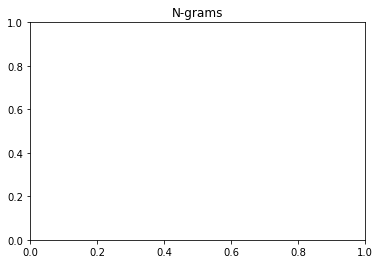

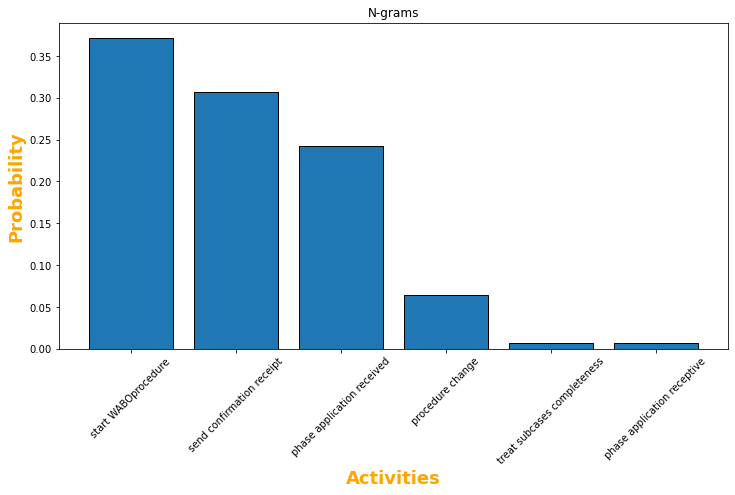

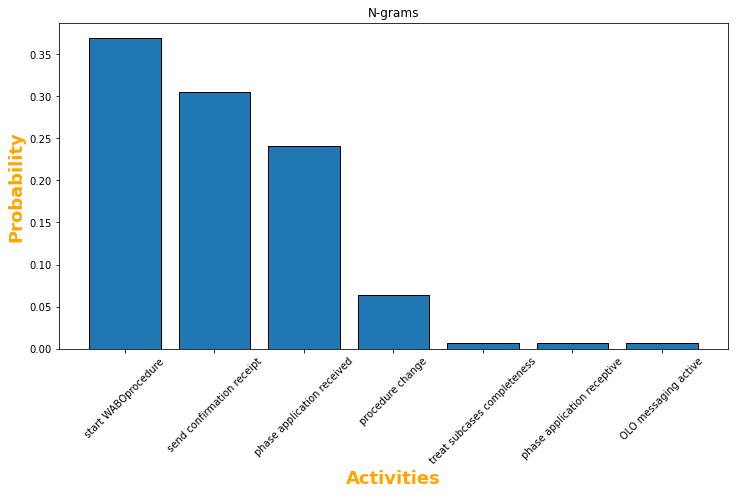

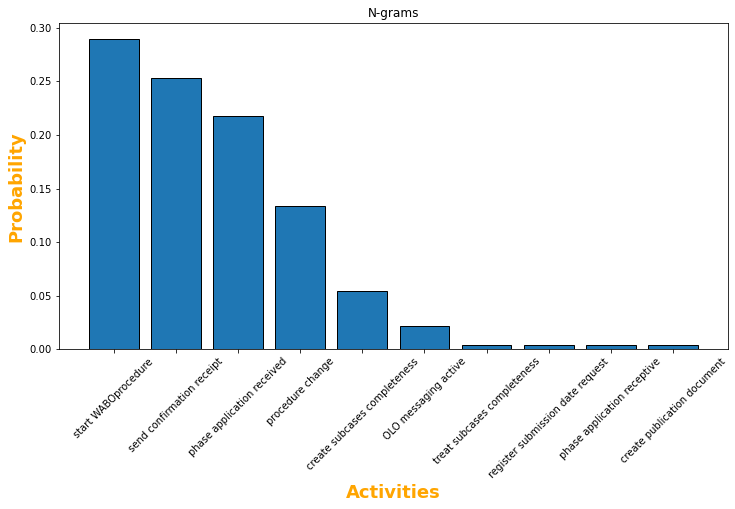

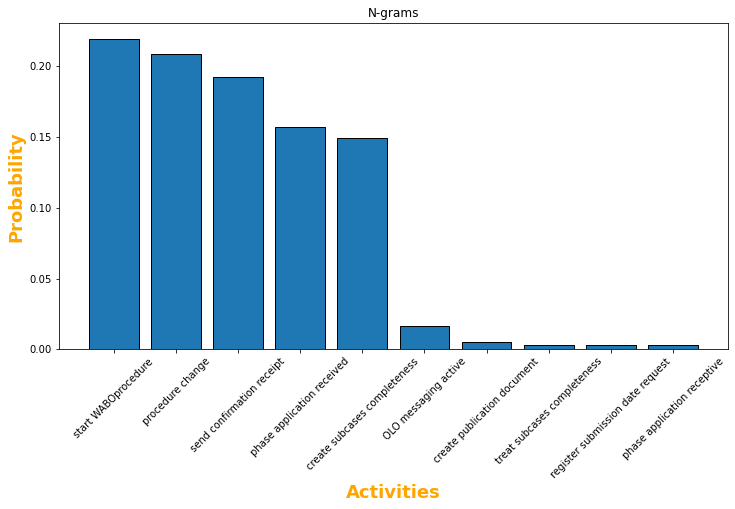

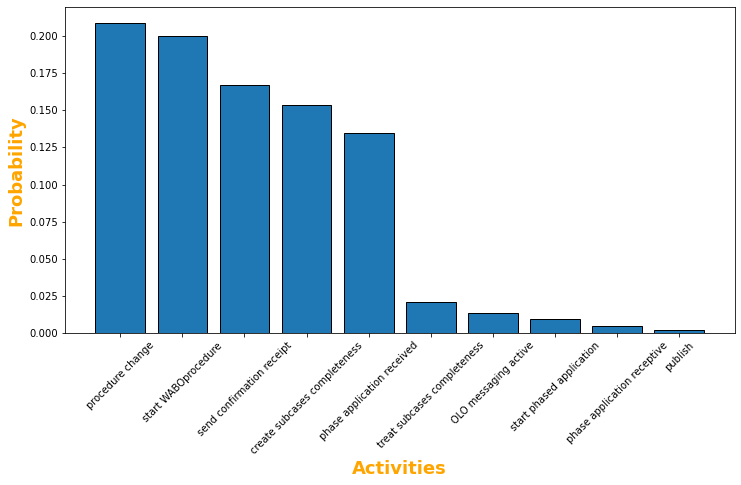

In [19]:
m=0
n= len(ip)
denometer=0
data=[]
for k in range(0, len(ip)):                            #loop for n grams
    for i in range(0, len(sequences)):                 #looop for sequences 1051
        for j in range(0, len(sequences[i])):          #loop for inner activites(each case)
            if(ipGram[k] == sequences[i][m+j:n+j-k]):
                denometer+=1
                if((n+j+k)< len(sequences[i])):
                    data.append(sequences[i][n+j-k+1])
                    
    ans= mediator(data, denometer)
    denometer=0
    data=[]
    df= createDataframe(ans)
    visualize(df)
    masterDataframe(ans)
        

# 3. Final output.  

In [20]:
final = pd.DataFrame(master,columns= list(ans.keys()),            #final dataframe
                 index=['5_Gram','4_Gram','3_Gram','2_Gram','1_Gram'])

In [21]:
final.head()

,phase application received,send confirmation receipt,procedure change,start WABOprocedure,start phased application,treat subcases completeness,phase application receptive,create subcases completeness,OLO messaging active,publish,register submission date request,grounds for refusal,create publication document,completed subcases content,date draft decision for inspection,terminate on request,WAW permit aspect,enter senddate retrieve missing data,read field phased application,create procedure confirmation,enter senddate procedure confirmation,no permit needed or only notification needed,coordination of application,create cover letter draft decision,forward to the competent authority,phase activity no permit required,assessment of content completed,activities regular procedure,regular procedure without MER
5_Gram,0.242857,0.307143,0.371429,0.007143,0.007143,0.064286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_Gram,0.241135,0.304965,0.368794,0.007092,0.007092,0.063830,0.007092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3_Gram,0.217391,0.253623,0.289855,0.003623,0.003623,0.134058,0.054348,0.021739,0.003623,0.003623,0.003623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_Gram,0.157182,0.192412,0.219512,0.002710,0.002710,0.208672,0.149051,0.016260,0.002710,0.005420,0.002710,0.00271,0.00271,0.00271,0.00271,0.00271,0.00542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1_Gram,0.134571,0.167053,0.208817,0.199536,0.009281,0.020882,0.004640,0.153132,0.013921,0.002320,0.002320,0.00464,0.00464,0.00464,0.00232,0.00464,0.00232,0.00232,0.00232,0.00232,0.00232,0.006961,0.00232,0.00232,0.00232,0.00232,0.00232,0.00232,0.00232
